>Installing mxnet framework

In [1]:
! pip install mxnet

>Installing gluoncv package

In [2]:
!pip install gluoncv

---
> Importing packages

In [3]:
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
from matplotlib import pyplot as plt
# using cpu
ctx = mx.cpu(0)

/usr/local/lib/python3.7/dist-packages/gluoncv/__init__.py:40: UserWarning: Both `mxnet==1.9.0` and `torch==1.10.0+cu111` are installed. You might encounter increased GPU memory footprint if both framework are used at the same time.
  warnings.warn(f'Both `mxnet=={mx.__version__}` and `torch=={torch.__version__}` are installed. '


---
>loading & Visualising image

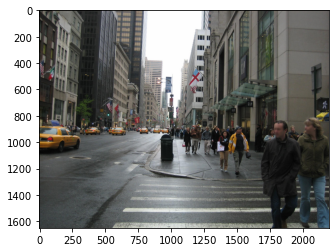

In [4]:
img = image.imread('test5.jpg')
plt.imshow(img.asnumpy())
plt.show()

---
>normalizing image

In [5]:
from gluoncv.data.transforms.presets.segmentation import test_transform
img_n = test_transform(img, ctx)

---
> Loading the pre-trained model and making prediction

In [6]:
# getting pre-trained models
model1 = gluoncv.model_zoo.get_model('fcn_resnet50_ade', pretrained=True)
model2 = gluoncv.model_zoo.get_model('psp_resnet101_ade', pretrained=True) 

# making prediction for models
output1 = model1.predict(img_n)
predict1 = mx.nd.squeeze(mx.nd.argmax(output1, 1)).asnumpy()
output2 = model2.predict(img_n)
predict2 = mx.nd.squeeze(mx.nd.argmax(output2, 1)).asnumpy()

# Adding color pallete for visualization
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
mask1 = get_color_pallete(predict1, 'ade20k')
mask2 = get_color_pallete(predict2, 'ade20k')

# saving Masks
mask1.save('output1.png')
mask2.save('output2.png')

self.crop_size 480


---
> Plotting Masks

Text(0.5, 1.0, 'PSPNet Output')

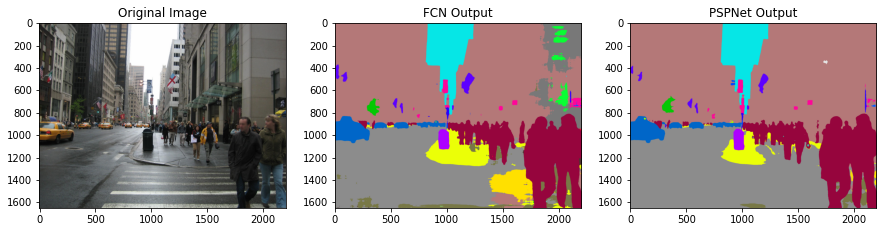

In [7]:
# showing predicted masks
mmask1 = mpimg.imread('output1.png')
mmask2 = mpimg.imread('output2.png')
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(img.asnumpy())
plt.title('Original Image')
plt.subplot(1, 3, 2)
plt.imshow(mmask1)
plt.title('FCN Output')
plt.subplot(1, 3, 3)
plt.imshow(mmask2)
plt.title('PSPNet Output')